# 1. Import the data

In [151]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import scipy.stats

from csv import writer
from functools import reduce

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

pd.set_option('display.max_colwidth', -1)
%matplotlib notebook
%matplotlib inline

In [152]:
#function to plot count
def plot_count(label,df):
    sns.set(style='darkgrid')
    sns.countplot(x = str(label),data = df,
              order = df[label].value_counts().index,palette="rocket")
    plt.title('Distribution of Classes')
    plt.show()

In [174]:
spam_ads = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/Spam_Ads_1237_withtextandtitle_020219.csv',encoding='utf-8')
ads_nice = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/RealSexAds_1698_withtextandtitle_020319.csv',encoding='utf-8')

In [176]:
ads_nice2 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/first_500_Phone_number_matching_url_positive_2_new_Feb3batch6_full.csv',encoding='utf-8')
spam_ads2 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/first_500_Phone_number_matching_url_positive_2_new_Feb3batch6_Scam_xbj_full.csv',encoding='utf-8')

In [177]:
spam_ads3 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/xbb_unique_morescam.csv',encoding='utf-8')
spam_ads4 = pd.read_csv( '/Users/cristiana/Desktop/Insight_project/xbb_unique_half.csv',encoding='utf-8')

In [178]:
print(spam_ads.shape, spam_ads2.shape, spam_ads3.shape,spam_ads4.shape, ads_nice.shape, ads_nice2.shape)

(1236, 3) (400, 3) (204, 3) (124, 3) (1698, 3) (497, 3)


In [179]:
spam_ads2 = spam_ads.append(spam_ads2)
ads_nice = ads_nice.append(ads_nice2)

In [180]:
spam_ads2 = spam_ads2.append(spam_ads3)

In [181]:
spam_ads2 = spam_ads2.append(spam_ads4)

In [182]:
ads_nice.shape

(2195, 3)

In [183]:
spam_ads2.shape

(1964, 3)

In [189]:
spam_ads2 = spam_ads2.dropna()
spam_ads2 = spam_ads2.drop_duplicates(subset=['Title'])#'Title','Text',

In [190]:
spam_ads2.shape

(676, 3)

In [191]:
ads_nice.shape

(1210, 3)

In [192]:
ads_nice = ads_nice.dropna()
ads_nice = ads_nice.drop_duplicates(subset=['Title'])#'Text',

In [193]:
ads_nice.shape

(1179, 3)

# 2. Some Information about the data

## 2.1 Data description

In [194]:
ads_nice.describe()

,URL,Text,Title
count,1179,1179,1179
unique,1179,1179,1179
top,https://www.cityxguide.com/escorts/daddy-s-little-girl-is-horny-text-me-717-970-0170__1539647551-13155536,"['\n', ""<p>Hi guys, My name is Lily. I'm Sexy, Fun, &amp; Sweet. I am ready for meetup. I live alone in my house so, you can come to me and we can have s)e*x. Or if you're married, don't worry, im very discrete and have my own house. I can also travel to you or we can do it in a hotel room. Safe, Discrete&amp; Respectful gentleman only please! Don't ask me about my donations, rates, money, bcoz you don't have to pay me for s**ex. So, no drama, no bs! Please be serious, safety is key for both of us.<br/>\nIf interested, text me or call for my more attractive pics n address📲 8046663895</p>"", '\n', '<p>\xa0</p>', '\n']",['Call me All Day ??? 503-662-seven578 | United States Escorts | Oregon Escorts | Corvallis Escorts | cityxguide.com']
freq,1,1,1


In [195]:
spam_ads2.describe()

,URL,Text,Title
count,676,676,676
unique,675,676,676
top,https://www.cityxguide.com/escorts/come-play-with-me1546471854-15348200,"['\n', '<p>I am so hungry for sex...........Looking anyone for play my................................hungry pussy and ass.<br/>\nIf you also hungry for sex..........................so hit me up now. I can host for ur pleasure..text me any..........time""""""""""""""724 446 8907</p>', '\n']",['👩▶️🍈◀️ 👩💏 420 cuddle buddy ❌❤💓100% real pic ▶️🍈 ◀️ 🆕 Text me 🔜 📞/💬 4848735493 | United States Escorts | Oklahoma Escorts | Norman Escorts | cityxguide.com']
freq,2,1,1


## 2.2 Words count

In [196]:
ads_nice['word_count'] = ads_nice['Text'].apply(lambda x: len(str(x).split(" ")))
spam_ads2['word_count'] = spam_ads2['Text'].apply(lambda x: len(str(x).split(" ")))

## 2.3 Number of character

In [197]:
ads_nice['char_count'] = ads_nice['Text'].str.len() 
spam_ads2['char_count'] = spam_ads2['Text'].str.len()

## 2.4 Average words length

In [198]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

ads_nice['avg_word'] = ads_nice['Text'].apply(lambda x: avg_word(x))
spam_ads2['avg_word'] = spam_ads2['Text'].apply(lambda x: avg_word(str(x)))

## 2.6 Number of Upper case

In [199]:
ads_nice['upper'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
spam_ads2['upper'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))

## 2.7 Number of special characters

In [200]:
ads_nice['questionmark'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('?')]))
spam_ads2['questionmark'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x.startswith('?')]))

In [201]:
import string

ads_nice['Punctuation'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x in string.punctuation]))
spam_ads2['Punctuation'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x in string.punctuation]))


## 2.8 Number of mistakes

In [202]:
from nltk.corpus import wordnet
ads_nice['Nmistakes'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if not wordnet.synsets(x) ]))
spam_ads2['Nmistakes'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if not wordnet.synsets(x) ]))

## 2.9 Number of stopwords

In [203]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

ads_nice['stopwords'] = ads_nice['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
spam_ads2['stopwords'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))

## 2.10 Number of emojii


In [204]:
import emoji
emoji_re = re.compile('[\\u203C-\\u3299\\U0001F000-\\U0001F644]',re.IGNORECASE)

ads_nice['Emojii'] = ads_nice['Text'].apply(lambda x: len([emoji_re.findall(x) for x in x.split() ]))
spam_ads2['Emojii'] = spam_ads2['Text'].apply(lambda x: len([emoji_re.findall(x) for x in str(x).split() ]))

## 2.11 Number of words that start with capital

In [205]:
ads_nice['NumOfCapital'] = ads_nice['Text'].apply(lambda x: len([x for x in str(x).split() if x.istitle()==True]))
spam_ads2['NumOfCapital'] = spam_ads2['Text'].apply(lambda x: len([x for x in str(x).split() if x.istitle()==True]))


## 2.11 Other unicode character (Voiced dental fricative)

In [206]:
unicode_re = re.compile('[\xF0\x9F\x98\xA2]',re.IGNORECASE)
ads_nice['unicode_re'] = ads_nice['Text'].apply(lambda x: len([unicode_re.findall(x) for x in x.split() ]))
spam_ads2['unicode_re'] = spam_ads2['Text'].apply(lambda x: len([unicode_re.findall(x) for x in str(x).split() ]))

In [207]:
unicode_jap = re.compile('[\u00F0\u00F5\u00A5]',re.IGNORECASE)
ads_nice['unicode_japanese'] = ads_nice['Text'].apply(lambda x: len([unicode_jap.findall(x) for x in x.split() ]))
spam_ads2['unicode_japanese'] = spam_ads2['Text'].apply(lambda x: len([unicode_jap.findall(x) for x in str(x).split() ]))

In [209]:
from nltk import word_tokenize, pos_tag
ads_nice['N_noun'] = ads_nice['Text'].apply(lambda x:  sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN'))/len(str(x).split(" ")) )
spam_ads2['N_noun']= spam_ads2['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN'))/len(str(x).split(" ")) )

In [210]:
ads_nice['N_adj'] = ads_nice['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('JJ'))/len(str(x).split(" ") ))
spam_ads2['N_adj']= spam_ads2['Text'].apply(lambda x:sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('JJ'))/len(str(x).split(" ") ))

In [211]:
ads_nice['N_verb'] = ads_nice['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('VB'))/len(str(x).split(" ") ))
spam_ads2['N_verb'] = spam_ads2['Text'].apply(lambda x:sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('VB'))/len(str(x).split(" ") ))

In [212]:
ads_nice['N_foreign'] = ads_nice['Text'].apply(lambda x: sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('FW'))/len(str(x).split(" ") ))
spam_ads2['N_foreign'] = spam_ads2['Text'].apply(lambda x:sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('FW'))/len(str(x).split(" ") ))

In [213]:
ads_nice.to_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelPositive_adsTEXT_counts_feb11.pkl')
ads_nice.to_csv('/Users/cristiana/Desktop/Insight_project/Total_unlabelPositive_adsTEXT_counts_feb11.csv')

In [214]:
spam_ads2.to_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelSPAM_adsTEXT_counts_feb11.pkl')
spam_ads2.to_csv('/Users/cristiana/Desktop/Insight_project/Total_labelSPAM_adsTEXT_counts_feb11.csv')

In [215]:
spam_ads2 = pd.read_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelSPAM_adsTEXT_counts_feb11.pkl')
ads_nice  = pd.read_pickle('/Users/cristiana/Desktop/Insight_project/Total_labelPositive_adsTEXT_counts_feb11.pkl')

## 2.12 Plot some results from data exploration


In [216]:
def plot_feat_sns(x,z, name):
    sns.set_palette("Set1")
    fig = plt.figure()
    sns.kdeplot(x, shade=True,label='True Ads')
    sns.kdeplot(z, shade=True,label='Spam');
    limit = z.max()
    plt.xlim(0,int(limit) )
    plt.xlabel(name)
    plt.ylabel('Entries Normalized')
    plt.legend(loc='best')
    plt.title('Histogram of '+str(name))
    return plt.show()

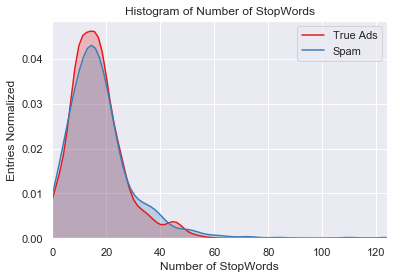

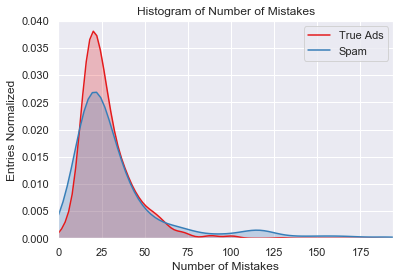

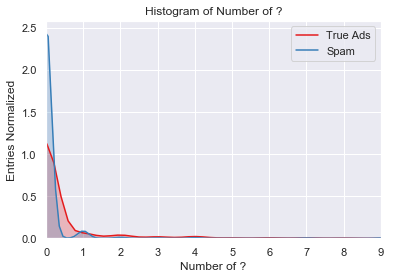

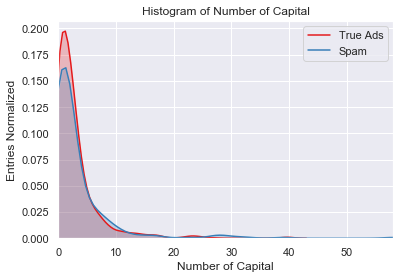

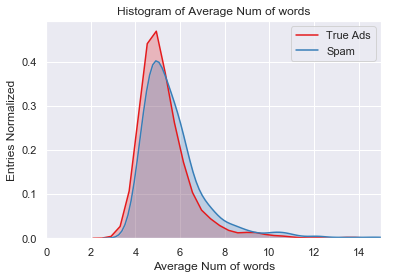

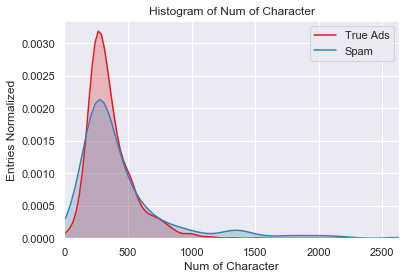

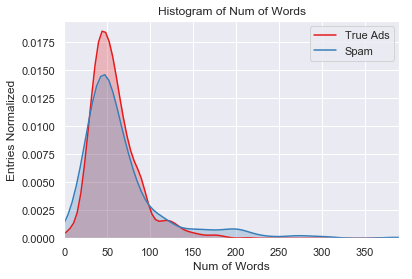

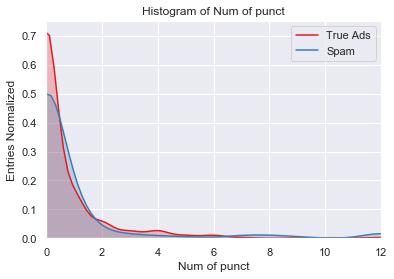

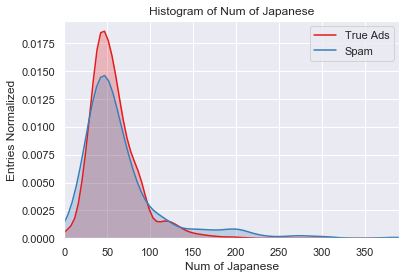

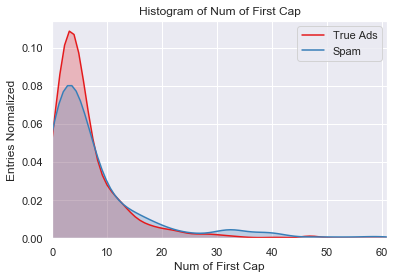

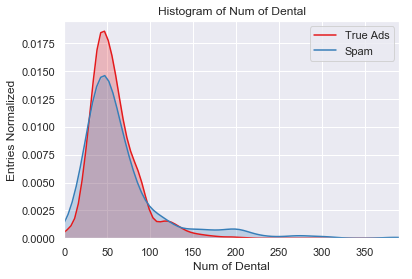

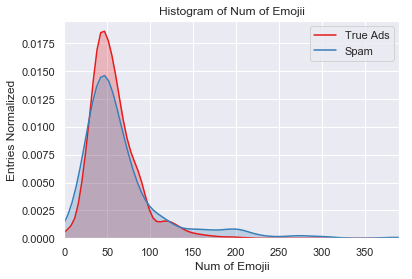

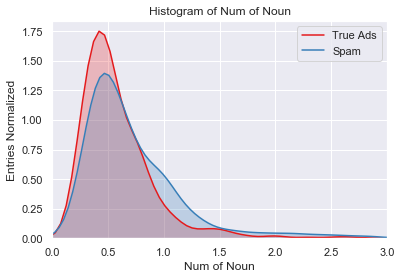

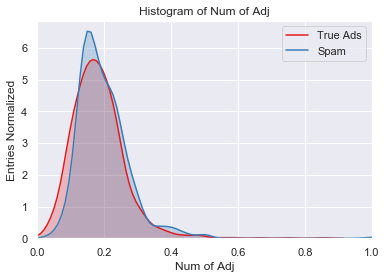

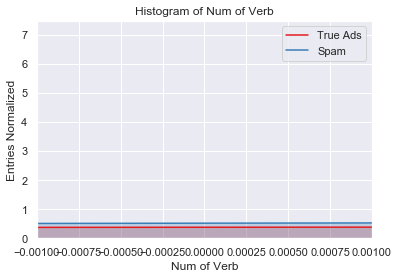

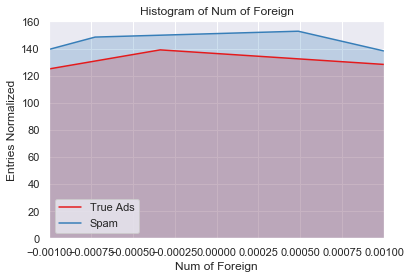

In [218]:
plot_feat_sns(ads_nice['stopwords'],spam_ads2['stopwords'],'Number of StopWords')
plot_feat_sns(ads_nice['Nmistakes'],spam_ads2['Nmistakes'],'Number of Mistakes')
plot_feat_sns(ads_nice['questionmark'],spam_ads2['questionmark'],'Number of ?')
plot_feat_sns(ads_nice['upper'],spam_ads2['upper'], 'Number of Capital')
plot_feat_sns(ads_nice['avg_word'],spam_ads2['avg_word'], 'Average Num of words')
plot_feat_sns(ads_nice['char_count'],spam_ads2['char_count'],'Num of Character')
plot_feat_sns(ads_nice['word_count'],spam_ads2['word_count'], 'Num of Words')
plot_feat_sns(ads_nice['Punctuation'],spam_ads2['Punctuation'], 'Num of punct')
plot_feat_sns(ads_nice['unicode_japanese'],spam_ads2['unicode_japanese'], 'Num of Japanese')
plot_feat_sns(ads_nice['NumOfCapital'],spam_ads2['NumOfCapital'], 'Num of First Cap')
plot_feat_sns(ads_nice['unicode_re'],spam_ads2['unicode_re'], 'Num of Dental')
plot_feat_sns(ads_nice['Emojii'],spam_ads2['Emojii'], 'Num of Emojii')
plot_feat_sns(ads_nice['N_noun'],spam_ads2['N_noun'], 'Num of Noun')
plot_feat_sns(ads_nice['N_adj'],spam_ads2['N_adj'], 'Num of Adj')
plot_feat_sns(ads_nice['N_verb'],spam_ads2['N_verb'],'Num of Verb')
plot_feat_sns(ads_nice['N_foreign'],spam_ads2['N_foreign'],'Num of Foreign')

# More text exploration

## Is there a phone number?

In [219]:
spam_ads2['Phone'] = spam_ads2['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')
ads_nice['Phone']  = ads_nice['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')
#df_alltext_numbersonly = df_alltext.body.str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')

<>:1: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-219-030cc623ae3d>:1: DeprecationWarning: invalid escape sequence \d
  spam_ads2['Phone'] = spam_ads2['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')
<ipython-input-219-030cc623ae3d>:2: DeprecationWarning: invalid escape sequence \d
  ads_nice['Phone']  = ads_nice['Text'].str.extract('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}[-\.\s]??\d{3}|\d{3}[-\.\s]??\d{4})')


## How many nan or phone? 

In [220]:
spam_ads2['Phone_01'] = spam_ads2['Phone'].notnull().astype(int)
ads_nice['Phone_01'] = ads_nice['Phone'].notnull().astype(int)

In [221]:
spam_ads2['Phone_01'].value_counts()

1    618
0    58 
Name: Phone_01, dtype: int64

In [222]:
ads_nice['Phone_01'].value_counts()

1    1115
0    64  
Name: Phone_01, dtype: int64

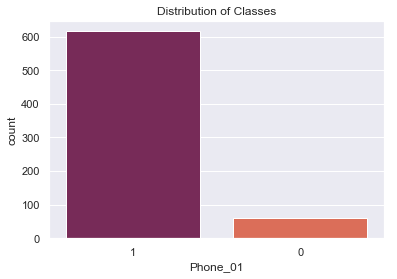

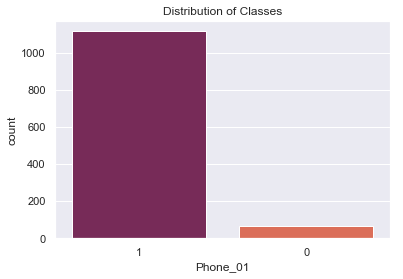

In [127]:
plot_count('Phone_01',spam_ads2)
plot_count('Phone_01',ads_nice)

## Does the phone has punctuation?

## Is there an email?

In [223]:
spam_ads2['Email'] = spam_ads2.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+|\w+@\w+)')
ads_nice['Email']  = ads_nice.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+ |\w+@\w+)')

<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-223-2e334040712e>:1: DeprecationWarning: invalid escape sequence \w
  spam_ads2['Email'] = spam_ads2.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+|\w+@\w+)')
<ipython-input-223-2e334040712e>:2: DeprecationWarning: invalid escape sequence \w
  ads_nice['Email']  = ads_nice.Text.str.extract('([a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+ |\w+@\w+)')


In [224]:
spam_ads2['Email_01'] = spam_ads2['Email'].notnull().astype(int)
ads_nice['Email_01'] = ads_nice['Email'].notnull().astype(int)

In [225]:
spam_ads2['Email_01'].value_counts()

0    676
Name: Email_01, dtype: int64

In [226]:
ads_nice['Email_01'].value_counts()

0    1176
1    3   
Name: Email_01, dtype: int64

# 3. Cleaning the text

In [237]:
import unicodedata
spam_ads2['str'] = spam_ads2['Text'].apply(lambda x: (unicodedata.normalize(u'NFKD', x).encode('ascii', 'ignore').decode('utf8')) )
ads_nice['str'] = ads_nice['Text'].apply(lambda x: (unicodedata.normalize(u'NFKD', x).encode('ascii', 'ignore').decode('utf8')) )


## 3.1 Lower words

In [248]:
ads_nice['ads_lower'] = ads_nice['str'].apply(lambda x: " ".join(x.lower() for x in x.split()))
spam_ads2['ads_lower'] =spam_ads2['str'].apply(lambda x: " ".join(x.lower() for x in x.split()))


## 3.2 emojii and character in one column

In [239]:
emoji_re = re.compile('[\\u203C-\\u3299\\U0001F000-\\U0001F644]')

ads_nice['Emojii_col'] = ads_nice['ads_lower'].apply(lambda x: emoji_re.findall(x))
spam_ads2['Emojii_col'] =spam_ads2['ads_lower'].apply(lambda x: emoji_re.findall(x))


In [240]:
unicode_re = re.compile('[\xF0\x9F\x98\xA2]',re.IGNORECASE)
ads_nice['Unicode_col'] = ads_nice['Text'].apply(lambda x: unicode_re.findall(x))
spam_ads2['Unicode_col'] =spam_ads2['Text'].apply(lambda x: unicode_re.findall(x))


In [241]:
print('[\u00F0\u00F5]')

[ðõ]


In [242]:
unicode_ar = re.compile('[[\u00F0\u00F9][\u00A0\u00A9][\u00C0\u00C9]]',re.IGNORECASE)

ads_nice['Unicode_col'] = ads_nice['Text'].apply(lambda x: unicode_ar.findall(x))
spam_ads2['Unicode_col'] =spam_ads2['Text'].apply(lambda x: unicode_ar.findall(x))

## 3.3 Some extra website cleaning

In [249]:
ads_nice['ads_clean_wont'] = ads_nice['ads_lower'].apply(lambda x: x.replace("wont"," won't "))
spam_ads2['ads_clean_wont'] = spam_ads2['ads_lower'].apply(lambda x: x.replace("wont"," won't "))

In [250]:
ads_nice['ads_clean_im'] = ads_nice['ads_clean_wont'].apply(lambda x: x.replace("im"," i'm "))
spam_ads2['ads_clean_im'] = spam_ads2['ads_clean_wont'].apply(lambda x: x.replace("im"," i'm "))

In [252]:
ads_nice['ads_clean_n'] = ads_nice['ads_clean_im'].apply(lambda x: x.replace(r"\n"," "))
spam_ads2['ads_clean_n'] = spam_ads2['ads_clean_im'].apply(lambda x: x.replace(r"\n"," "))

In [288]:
ads_nice['ads_clean_xa0'] = ads_nice['ads_clean_n'].apply(lambda x: x.replace(r"\xa0"," "))
spam_ads2['ads_clean_xa0'] = spam_ads2['ads_clean_n'].apply(lambda x: x.replace(r"\xa0"," "))

In [289]:
ads_nice['ads_clean_x9f'] = ads_nice['ads_clean_xa0'].apply(lambda x: x.replace(r"\x9f"," "))
spam_ads2['ads_clean_x9f'] = spam_ads2['ads_clean_xa0'].apply(lambda x: x.replace(r"\x9f"," "))

In [302]:
ads_nice['ads_clean_x'] = ads_nice['ads_clean_x9f'].apply(lambda x: x.replace(r"\x"," "))
spam_ads2['ads_clean_x'] = spam_ads2['ads_clean_x9f'].apply(lambda x: x.replace(r"\x"," "))

In [303]:
remove_web = re.compile(r'[^\x00-\x9c]')
ads_nice['ads_clean_web'] = ads_nice['ads_clean_x'].apply(lambda x: remove_web.sub(" ",x) )
spam_ads2['ads_clean_web'] =spam_ads2['ads_clean_x'].apply(lambda x: remove_web.sub(" ",x) )

## 3.4  Change all the words that mean number in words and check if there are phone numbers, remove the res

In [304]:
#remove web stuff
remove_pun = re.compile("<[^>]+>",re.IGNORECASE)

ads_nice['ads_clean_web2'] = ads_nice['ads_clean_web'].apply(lambda x: remove_pun.sub("",x) )
spam_ads2['ads_clean_web2'] =spam_ads2['ads_clean_web'].apply(lambda x: remove_pun.sub("",x) )

In [321]:
#remove digits
remove_pun = re.compile(r"[0-9().,\-!?@&:$;*/\[\]\%'\`\"\_\n\\\<\>]+",re.IGNORECASE)

ads_nice['ads_clean_nocontr_punt'] = ads_nice['ads_clean_web2'].apply(lambda x: remove_pun.sub(" ",x) )
spam_ads2['ads_clean_nocontr_punt'] =spam_ads2['ads_clean_web2'].apply(lambda x: remove_pun.sub(" ",x) )

In [322]:
# Remove emojii only from one and use two column
unicode_ar = re.compile(r'[[\u00F0\u00F9][\u00A0\u00A9][\u00C0\u00C9]]+',re.IGNORECASE)
ads_nice['Emojii_strip'] = ads_nice['ads_clean_nocontr_punt'].apply(lambda x: emoji_re.sub("",x) )
spam_ads2['Emojii_strip'] =spam_ads2['ads_clean_nocontr_punt'].apply(lambda x: emoji_re.sub("",x) )
ads_nice['Unicode_strip'] = ads_nice['Emojii_strip'].apply(lambda x: unicode_re.sub("",x) )
spam_ads2['Unicode_strip'] =spam_ads2['Emojii_strip'].apply(lambda x: unicode_re.sub("",x) )
ads_nice['Unicode_ar'] = ads_nice['Unicode_strip'].apply(lambda x: unicode_ar.sub("",x) )
spam_ads2['Unicode_ar'] =spam_ads2['Unicode_strip'].apply(lambda x: unicode_ar.sub("",x) )

In [323]:
spam_ads2['Unicode_ar']

0           a        hi my name is mercedes  ia    m   real  ia    m independent  seeking generous gentleman to have a good t i m e with  ia    m offering outcalls and carfun  you must have a car text me now                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## 3.3.1 Contraction

In [324]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i m": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it d": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [325]:
import re
ps = nltk.PorterStemmer()
#preprocess the dataset
def preprocess_text(text):
    # Convert words to lower case
    text = text.lower()
    # Replace contractions with their longer forms 
    if True:
        # We are not using "text.split()" here
        #since it is not fool proof, e.g. words followed by punctuations "Are you kidding?I think you aren't."
        text = re.findall(r"[\w']+", text)
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
   

    return text
       
#clean_data = sample_data.copy()  

ads_nice['ads_clean_nocontr']= ads_nice['Unicode_ar'].apply(preprocess_text) #lambda x: cut_phone(x) )
spam_ads2['ads_clean_nocontr']=spam_ads2['Unicode_ar'].apply(preprocess_text) #.apply(lambda x: cut_phone(x) )


## 3.3 Regular expression

In [326]:
ads_nice['ads_clean_nocontr_ht'] = ads_nice['ads_clean_nocontr'].str.replace(r"http\S+", " ")
ads_nice['ads_clean_nocontr_htp'] = ads_nice['ads_clean_nocontr_ht'].str.replace(r"http", " ")
ads_nice['ads_clean_nocontr_S'] = ads_nice['ads_clean_nocontr_htp'].str.replace(r"@\S+", " ")

spam_ads2['ads_clean_nocontr_ht'] = spam_ads2['ads_clean_nocontr'].str.replace(r"http\S+", " ")
spam_ads2['ads_clean_nocontr_htp'] = spam_ads2['ads_clean_nocontr_ht'].str.replace(r"http", " ")
spam_ads2['ads_clean_nocontr_S'] = spam_ads2['ads_clean_nocontr_htp'].str.replace(r"@\S+", " ")

## 3.5 Spelling Correction

In [327]:
from textblob import TextBlob
ads_nice['ads_clean_nocontr_spell'] = ads_nice['ads_clean_nocontr_S'].apply(lambda x: str(TextBlob(x).correct()))
spam_ads2['ads_clean_nocontr_spell'] = spam_ads2['ads_clean_nocontr_S'].apply(lambda x: str(TextBlob(x).correct()))

## 3.6 Remove stopword

In [329]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


spam_ads2['ads_clean_nocontr_stopword'] = spam_ads2['ads_clean_nocontr_spell'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ads_nice['ads_clean_nocontr_stopword'] = ads_nice['ads_clean_nocontr_spell'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## 3.7 Remove words that come from the ads

In [330]:
ads_words = ['post','ads','united','states','hair', 'home', 'last', 'updated', 'available', 'gmt 8','im','gmt','category','name','location','color','build','height','rate','screening','reviews','updated','atcityxguide','eye','com','washington','seattle','can', 'lets', 'about', 'till',  'get', "let's", 'im', 'tried', 'let', 'know', 'u', 'looks', 'try', 'til', 'text', 'tries',  'ur', 'name', 'must', 'wants', 'hi', "i'm", 'likes','b4', 'hmu', 'ring', 'u', 'c', 'r', 'b', 'n', 'd', 's', 'give']
spam_ads2['ads_clean_nocontr_MoreWord'] = spam_ads2['ads_clean_nocontr_stopword'].apply(lambda x: " ".join(x for x in x.split() if x not in ads_words))
ads_nice['ads_clean_nocontr_MoreWord'] = ads_nice['ads_clean_nocontr_stopword'].apply(lambda x: " ".join(x for x in x.split() if x not in ads_words))

## 3.8 Remove short word

In [331]:
ads_nice['ads_clean_short'] = ads_nice['ads_clean_nocontr_MoreWord'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))
spam_ads2['ads_clean_short'] = spam_ads2['ads_clean_nocontr_MoreWord'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))



In [332]:
# Why those weird a didn't get elimanetd???
#remove web stuff
why = re.compile("\u00C3",re.IGNORECASE)

ads_nice['ads_clean_why'] = ads_nice['ads_clean_short'].apply(lambda x: why.sub("",x) )
spam_ads2['ads_clean_why'] =spam_ads2['ads_clean_short'].apply(lambda x: why.sub("",x) )

In [333]:
why = re.compile("\u00C2",re.IGNORECASE)

ads_nice['ads_clean_why2'] = ads_nice['ads_clean_why'].apply(lambda x: why.sub("",x) )
spam_ads2['ads_clean_why2'] =spam_ads2['ads_clean_why'].apply(lambda x: why.sub("",x) )

## 3.8 Common word removal

In [339]:
freq1 = pd.Series(' '.join(ads_nice['ads_clean_why2']).split()).value_counts()[:10]
freq1

sex        855
looking    606
fun        435
girl       430
come       406
call       383
want       356
real       329
amp        324
love       300
dtype: int64

In [340]:
freq2 = pd.Series(' '.join(spam_ads2['ads_clean_why2']).split()).value_counts()[:10]
freq2

sex        532
looking    334
hour       301
amp        258
come       250
girl       246
fun        227
want       216
call       210
body       195
dtype: int64

In [341]:
freq1 = list(freq1.index)
ads_nice['ads_clean_freq'] = ads_nice['ads_clean_why2'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))


In [342]:
freq2 = list(freq2.index)
spam_ads2['ads_clean_freq'] = spam_ads2['ads_clean_why2'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))



## 3.9 Rare words removal

In [344]:
not_freq = pd.Series(' '.join(ads_nice['ads_clean_freq']).split()).value_counts()[-5:]
not_freq


interest      1
island        1
bondage       1
australian    1
delights      1
dtype: int64

In [227]:
not_freq2 = pd.Series(' '.join(spam_ads2['ads_clean_freq']).split()).value_counts()[-5:]
not_freq2

xfxcxfn                                                                         1
happiest                                                                        1
major                                                                           1
exhaustionnplease                                                               1
sexes                                                                           1
verifiedhey                                                                     1
dandy                                                                           1
attractivexanxa                                                                 1
jack                                                                            1
somexanstress                                                                   1
bones                                                                           1
access                                                                          1
nownthat        

In [ ]:
not_freq = list(not_freq.index)
ads_nice['ads_clean_rare'] = ads_nice['ads_clean_freq'].apply(lambda x: " ".join(x for x in x.split() if x not in not_freq))


In [ ]:
not_freq2 = list(not_freq2.index)
spam_ads2['ads_clean_rare'] = spam_ads2['ads_clean_freq'].apply(lambda x: " ".join(x for x in x.split() if x not in not_freq))



In [345]:
ads_nice.to_pickle('Total_labelPositive_adsTEXT_+_counts_CLEAN_withcommom_feb11.pkl')
ads_nice.to_csv('Total_labelPositive_adsTEXT_+_counts_CLEAN_withcommom_feb11.csv')
spam_ads2.to_pickle('Total_labelSPAM_adsTEXT_+_counts_CLEAN_withcommom_feb11.pkl')
spam_ads2.to_csv('Total_labelSPAM_adsTEXT_+_counts_CLEAN_withcommom_feb11.csv')